In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import helper_import_path 

#### Original request data

In [82]:
#loop through above path and get all the reg ids
reg_ids = []
for filepath in glob.glob('./../Data/original_req_off_'+'[0-9]*'+'_lim_10000.csv'):
    reg_ids.extend(pd.read_csv(filepath)['registration_no'].apply(lambda x:x.rstrip()))
    

In [83]:
print(len(set(reg_ids)))
#reg_ids 

222129


#### Request Movement data

In [84]:
reg_all_mov_ids = []
for filepath in glob.glob('./../Data/req_movement_off_'+'[0-9]*'+'_lim_10000.csv'):
    reg_all_mov_ids.extend(pd.read_csv(filepath)['registration_no'].apply(lambda x:x.rstrip()))

print(len(set(reg_all_mov_ids)))

32890


#### Registration ID for which request movement data is available.

In [85]:
print(len(set(reg_ids) - set(reg_all_mov_ids)))

189255


#### Create the data for selected Action req

In [86]:
def selecting_req_data_for_action(data_request_movement_df,read_offset,read_limit,
                                  single_action =True,
                                  single_action_name='EXAMINED AT OUR LEVEL',
                                  selected_action_list=['INTERIM REPLY TO COMPLAINANT','CASE DISPOSED OF','CASE REPORT SENT AND DISPOSED LOCALLY ','EXAMINED AT OUR LEVEL']):

    if single_action:
        ## Selecting single action data only Only
        new_action_df = data_request_movement_df.loc[(data_request_movement_df['action_name'] == single_action_name)]
        #new_df.head(20)
        new_action_df['registration_no'] = new_action_df['registration_no'].apply(lambda x:x.rstrip())
        new_action_df.to_csv("../Data/req_movement_EAOL_off_"+str(read_offset)+"_lim_"+str(read_limit)+".csv",index=False)
    else:
        ## Selecting Multiple actions. Stores 1 file corresponding to each req_movement file
        new_action_df = data_request_movement_df.loc[(data_request_movement_df['action_name'].apply(lambda x:x in selected_action_list))]
        new_action_df['registration_no'] = new_action_df['registration_no'].apply(lambda x:x.rstrip())
        new_action_df.to_csv("../Data/req_movement_sel_action_off_"+str(read_offset)+"_lim_"+str(read_limit)+".csv",index=False)
    return new_action_df

In [87]:
## Read the request movement data and make the sel_action data set.
import glob
import re
read_limit = 10000
selected_action_req_data = pd.DataFrame()

file_search_pattern = './../Data/req_movement_off_(.+?)_lim_10000.csv'
for filepath in glob.glob('./../Data/req_movement_off_'+'[0-9]*'+'_lim_10000.csv'):
    #print(filepath)
    m = re.search(file_search_pattern, filepath)
    if m:
        read_offset = m.group(1)
    else:
        print("Could not find the file Please check if the file is named correctly and matches the pattern.",file_search_pattern)
        print("Path found",filepath)
        continue
    #print(offset)
    
    temp = pd.read_csv(filepath)
    #'CASE REPORT SENT AND DISPOSED LOCALLY ',
    new_EAOL_df = selecting_req_data_for_action(temp,read_offset,read_limit,
                                  single_action =False,
                                  single_action_name='EXAMINED AT OUR LEVEL',
                                  selected_action_list=['INTERIM REPLY TO COMPLAINANT','CASE DISPOSED OF','EXAMINED AT OUR LEVEL'])
    new_EAOL_df.reset_index(drop=True,inplace=True)
    
    print("Rows of interest",new_EAOL_df.shape)
    if selected_action_req_data.shape[0] == 0:
        selected_action_req_data = new_EAOL_df
    else:
        selected_action_req_data = selected_action_req_data.append(new_EAOL_df,ignore_index=True)
    

selected_action_req_data.shape

/Users/ankita.bhatia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Rows of interest (1877, 8)
Rows of interest (1255, 8)
Rows of interest (1386, 8)
Rows of interest (1655, 8)
Rows of interest (1226, 8)
Rows of interest (1526, 8)
Rows of interest (1898, 8)
Rows of interest (1422, 8)
Rows of interest (1420, 8)
Rows of interest (1737, 8)
Rows of interest (1243, 8)
Rows of interest (2307, 8)
Rows of interest (1242, 8)
Rows of interest (1648, 8)
Rows of interest (1288, 8)
Rows of interest (1784, 8)
Rows of interest (1223, 8)
Rows of interest (1336, 8)
Rows of interest (1865, 8)
Rows of interest (1306, 8)
Rows of interest (1220, 8)
Rows of interest (1920, 8)
Rows of interest (1212, 8)
Rows of interest (1421, 8)
Rows of interest (1725, 8)
Rows of interest (2238, 8)
Rows of interest (3065, 8)
Rows of interest (1464, 8)
Rows of interest (2958, 8)
Rows of interest (1250, 8)
Rows of interest (1262, 8)


(50379, 8)

#### Registration IDs for which request movement data with selected action is available.

In [88]:
print(len(set(reg_ids) - set(selected_action_req_data['registration_no'])))

192764


In [89]:
## Read the reference file for 'Parent of Organisation' and 'Apex Ministry/Dept/State'
#This section of code reds the org_name from action_req dataset and finds out 'Apex Ministry/Dept/State'

#read the file 
filepath_NodalOfficer_Details = "./../Data/" 
filename_NodalOfficer_Details = "NodalOfficer_Details.csv"
print(filepath_NodalOfficer_Details + filename_NodalOfficer_Details)
data_NodalOfficer_Details = pd.read_csv(filepath_NodalOfficer_Details + filename_NodalOfficer_Details, header=0, encoding = 'unicode_escape' )

./../Data/NodalOfficer_Details.csv


In [90]:
## LONG Runtime Warning. This code will take a lot of time to run.
#find out what is the 'Apex Ministry/Dept/State' and 'Parent of Organisation'
#print(new_EAOL_df['org_name'], " : ", data_NodalOfficer_Details['org_name'])
new_OrgName_df = []
new_Apex_org = []
reference_colnames = ['Apex Ministry/Dept/State','Parent of Organisation']
multi_val_org = []
for org_name in selected_action_req_data['org_name']:
    #print(org_name)
    
    temp = data_NodalOfficer_Details.loc[(data_NodalOfficer_Details['org_name']== org_name),reference_colnames]
    if temp.shape[0] == 0:
        #need to store and continue
        new_OrgName_df.append(None)
        new_Apex_org.append(None)
        continue
    if len(temp[reference_colnames[0]].unique()) >1:
     # to know which ones have multiple Parent dept name.
        if org_name not in multi_val_org:
            multi_val_org.append(org_name)
        #print(temp)
        #print("More than one values")
        #break
    new_OrgName_df.append(temp[reference_colnames[1]].values)
    new_Apex_org.append(temp[reference_colnames[0]].values[0])
    #new_OrgName_df.append(data_NodalOfficer_Details[(data_NodalOfficer_Details['org_name']== org_name)], ignore_index = True)

In [91]:
print(len(new_OrgName_df))
print(selected_action_req_data.shape)

50379
(50379, 8)


In [92]:
## Append to original data and store this in a file
selected_action_req_data['Parent_org_name'] = new_OrgName_df
selected_action_req_data['Apex_org_name'] = new_Apex_org

In [93]:
selected_action_req_data[y_colname].values

array(['Government of Gujarat', 'Government of Gujarat',
       'Ministry of Labour and Employment', ...,
       'Central Board of Direct Taxes (Income Tax)',
       'Central Board of Direct Taxes (Income Tax)',
       'Central Board of Direct Taxes (Income Tax)'], dtype=object)

In [94]:
#Selected action req movement data - filename. Will be used in multiple sections after this.
selected_action_req_filename = "./../Data/processed_selected_action_Jan2.csv"

In [95]:
selected_action_req_data.to_csv(selected_action_req_filename, header=True,index=False)

In [96]:
reg_selected_mov_ids = []
for filepath in glob.glob(selected_action_req_filename):#req_movement_EAOL_off_'+'[0-9]*'+'_lim_10000.csv'):
    temp = pd.read_csv(filepath)['registration_no'].apply(lambda x:x.rstrip())
    reg_selected_mov_ids.extend(temp.unique())

print("Unique registration IDs in selected Action request data",len(set(reg_selected_mov_ids)))

Unique registration IDs in selected Action request data 29365


#### Number of request IDs that have all the data we need for training.

In [99]:
not_common_reg_ids = list(set(reg_ids) - set(reg_selected_mov_ids))
common_reg_ids = list(set(reg_ids) - set(not_common))
print("The req ids not in selected action movement data",len(not_common_reg_ids))
print("Number of reg ids that Can Be Used (as they are in original request data and selected action data)",len(common_reg_ids))

The req ids not in selected action movement data 192764
Number of reg ids that Can Be Used (as they are in original request data and selected action data) 29365


In [100]:
assert common_reg_ids[0] in reg_ids,"Registration ID to be used must exist in original request list"
assert common_reg_ids[0] in reg_selected_mov_ids,"Registration ID to be used must exist in Request Movement list"

#### Distribute the selected registration ids as Train, Test and Validation data. (Currently not used)

In [101]:
#sample reg ids based on train test val split with sample
import random
random.seed(4)
base_list = set(common_reg_ids) # why EAOL since those are the tickets we are targetting.
train_reg_list = random.sample(base_list, int(0.7 * len(base_list)))
remaining_regs = list((set(base_list)-set(train_reg_list)))
test_reg_list = random.sample(remaining_regs, int(0.2*len(base_list)))
val_reg_list = list(set(remaining_regs) - set(test_reg_list))

print("Training set length ",len(train_reg_list))
print("Test set length ",len(test_reg_list))
print("Val set length ",len(val_reg_list))

Training set length  20555
Test set length  5873
Val set length  2937


#### Store the data for the Shortlisted registration IDs in the csv files. 
##### This will later be used by Gridsearchfor model building

###### Original Request data

In [102]:
#loop through above path and get all the reg ids
import helper_import_path
import removing_dup_reg_nos as remove_dup

selected_reg_orig_req_fname = "./../Data/selected_original_req_dataJan2.csv"

selected_original_df = pd.DataFrame()
for filepath in glob.glob('./../Data/original_req_off_'+'[0-9]*'+'_lim_10000.csv'):
    #print("File",filepath)
    original_req_data = pd.read_csv(filepath)
    original_req_data['registration_no'] =  (original_req_data['registration_no'].apply(lambda x:x.rstrip()))
    original_req_data = remove_dup.removing_dup_reg_nos(original_req_data)
    #print("Total rows after removing duplicates",original_req_data.shape)
    #print("Reg Ids found in current data set", (original_req_data.loc[original_req_data['registration_no'].apply(lambda x: x in reg_eaol_mov_ids),:]).shape)
    if selected_original_df.shape[0] == 0:
        selected_original_df = original_req_data.loc[original_req_data['registration_no'].apply(lambda x: x in common_reg_ids),:]
        #print("Selected shape in if",selected_original_df.shape)
    else:
        temp =  original_req_data.loc[original_req_data['registration_no'].apply(lambda x: x in common_reg_ids),:]
        selected_original_df = selected_original_df.append(temp,ignore_index = True)
        #print("Selected shape",selected_original_df.shape)
print("Selected original reg data",selected_original_df.shape)

selected_original_df.to_csv(selected_reg_orig_req_fname,index =False)

Selected original reg data (29365, 13)


In [103]:
## Unique reg id in original dataset
assert len(selected_original_df['registration_no'].unique()) == len(common_reg_ids),"The number of reg ids available in selected original request data should be equal to the number selected for model building."


###### Request Movement Data

In [104]:
all_action_req_data = pd.read_csv(selected_action_req_filename)
## Unique reg id in request movement dataset
assert len(all_action_req_data['registration_no'].unique()) == len(common_reg_ids),"The number of reg ids available in selected request movement data should be equal to the number selected for model building."


In [105]:
## Select the common reg ids from this data.
selected_action_req_data = all_action_req_data.loc[all_action_req_data['registration_no'].apply(lambda x: x in common_reg_ids),:]
print("Number of requested ids from selected action dataset,", len(selected_action_req_data['registration_no'].unique()))

Number of requested ids from selected action dataset, 29365


In [108]:
## Remove rows with duplicate reg Ids, Reason : To merge with the original req_data
print("Number of rows in the selected action req data",selected_action_req_data.shape)
if selected_action_req_data.shape[0] != len(selected_action_req_data['registration_no'].unique()):
    selected_action_req_data = remove_dup.removing_dup_reg_nos(selected_action_req_data)
    print("Number of rows in the selected action req data after removing duplicates",selected_action_req_data.shape)
    assert selected_action_req_data.shape[0] == len(common_reg_ids),"Problem in selecting the common registration IDs across file."

Number of rows in the selected action req data (29365, 10)


In [109]:
## Decide on a y Column and encode the same.
y_colname = 'Apex_org_name'#'Parent_org_name' #'
def encode_y(selected_req_df,y_colname = y_colname):
    import model_builder_helper as mbh
    # Write encoded data to the DF and csv file
     #'Apex_org_name'
    selected_req_df['encoded_y'],label_encoder_y = mbh.get_encoded_values(selected_req_df[y_colname].fillna('X'))
    import pickle
    # Persiting the encoder so, we can use it later to decode.
    with open("./../TrainedVectors/labelencoder_y.pickle", "wb") as f:
        pickle.dump(label_encoder_y, f)
    return selected_req_df,label_encoder_y

In [110]:
encoded_action_req_data,label_encoder_y = encode_y(selected_action_req_data,y_colname = y_colname)

### Merge the data from both files on registration.

In [111]:
# When running this file in sequence
original_df = selected_original_df[['country_name','distname','registration_no', 'state_name', 'subject_content']]
## Else read from a pre-stored csv
#selected_original_df = pd.read_csv(selected_reg_orig_req_fname)
#print("Selected original reg data",selected_original_df.shape)

In [113]:
assert encoded_action_req_data.shape[0] == original_df.shape[0],"The rows in req movement and original req data are not same for merge."

In [128]:
# merge these two so that the data required to build the test and train are in the same file
merged_df = encoded_action_req_data.merge(original_df, on='registration_no',how = "inner")

In [129]:
assert merged_df.shape[0] == encoded_action_req_data.shape[0],"The number of rows obtained after merging should be equal to original dataset."

In [130]:
merged_df.columns


Index(['Unnamed: 0', 'action_name', 'action_srno', 'date_of_action',
       'org_name', 'org_name2', 'registration_no', 'remarks',
       'Parent_org_name', 'Apex_org_name', 'encoded_y', 'country_name',
       'distname', 'state_name', 'subject_content'],
      dtype='object')

In [131]:
## reset index before saving to csv
merged_df.reset_index(inplace=True,drop=True)

In [135]:
merged_data_filename = "./../Data/merged_action_req_movementJan2.csv"

In [132]:
#merged_df.to_csv("./../Data/merged_eaol_original_10179.csv", header=True,index=False)
merged_df.to_csv(merged_data_filename, header=True,index=False)

In [134]:
## Visual verification
#merged_df.head()

## EDA on the Merged data

In [136]:
import pandas as pd
# Reading directly from saved file to save time
merged_df = pd.read_csv(merged_data_filename)
len(merged_df['encoded_y'].unique())

75

In [137]:
def plot_freq(merged_df):
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.hist(merged_df['encoded_y'])#,bins=len(merged_df['encoded_y'].value_counts()))
    plt.show()

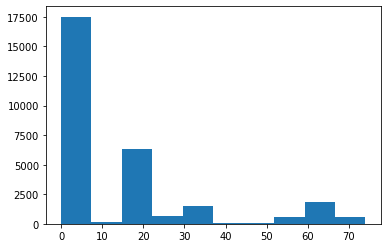

In [138]:
plot_freq(merged_df)

In [139]:
index_value_counts = merged_df['encoded_y'].value_counts()
#print(index_value_counts)
#most_frequent_class = index_value_counts[index_value_counts.values == max(index_value_counts)]
#print(most_frequent_class)
#df_less_freq_y = merged_df.loc[merged_df['encoded_y'] != most_frequent_class,:]

In [147]:
scatter_df = merged_df.groupby(['encoded_y']).size().reset_index().rename(columns={0:'count'})
#print(scatter_df)
threshold = 30
low_freq_classes = scatter_df[scatter_df['count']<threshold]
#plt.scatter(prediction_df['actual_id'],prediction_df['pred_id'],s=scatter_df['count'],alpha=0.5)
#print(low_freq_classes)
print("Shape of the dataframe with low freq classes",low_freq_classes.shape)
print("Number of Unique classes",len(low_freq_classes['encoded_y'].unique()))
other_classes = low_freq_classes['encoded_y'].unique()
#print(other_classes)
reduced_class_data = merged_df.copy(deep=True)

reduced_class_data[y_colname] = np.where((reduced_class_data['encoded_y'].apply(lambda x:x in other_classes)),'Other',reduced_class_data[y_colname])


Shape of the dataframe with low freq classes (50, 2)
Number of Unique classes 50


In [148]:
label_encoder_y.inverse_transform([54])

array(['Ministry of External Affairs'], dtype=object)

In [149]:
df = pd.DataFrame([reduced_class_data[y_colname],merged_df[y_colname]])
df

,0,1,2,3,4,5,6,7,8,9,...,29355,29356,29357,29358,29359,29360,29361,29362,29363,29364
Apex_org_name,Ministry of Labour and Employment,Department of Health & Family Welfare,Department of Health & Family Welfare,Department of Health & Family Welfare,Department of Health & Family Welfare,Department of Health & Family Welfare,Department of Health & Family Welfare,Department of Higher Education,Department of Health & Family Welfare,Department of Health & Family Welfare,...,Department of Financial Services (Banking Divi...,Government of Gujarat,Government of Gujarat,Government of Gujarat,Reserve Bank of India,Department of Financial Services (Banking Divi...,Reserve Bank of India,Department of Financial Services (Banking Divi...,Department of Financial Services (Banking Divi...,Department of Financial Services (Banking Divi...
Apex_org_name,Ministry of Labour and Employment,Department of Health & Family Welfare,Department of Health & Family Welfare,Department of Health & Family Welfare,Department of Health & Family Welfare,Department of Health & Family Welfare,Department of Health & Family Welfare,Department of Higher Education,Department of Health & Family Welfare,Department of Health & Family Welfare,...,Department of Financial Services (Banking Divi...,Government of Gujarat,Government of Gujarat,Government of Gujarat,Reserve Bank of India,Department of Financial Services (Banking Divi...,Reserve Bank of India,Department of Financial Services (Banking Divi...,Department of Financial Services (Banking Divi...,Department of Financial Services (Banking Divi...


In [150]:
reduced_class_data,_ = encode_y(reduced_class_data,y_colname = y_colname)
reduced_class_data.to_csv("./../Data/merged_eaol_reduced_classes_"+str(threshold)+".csv", header=True,index=False)

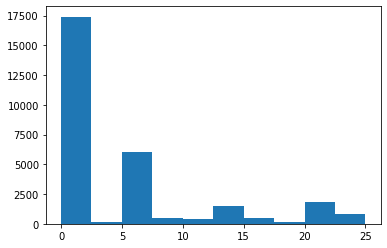

In [151]:
plot_freq(reduced_class_data)


In [152]:
len(reduced_class_data['encoded_y'].unique())

26

In [153]:
scatter_df = reduced_class_data.groupby(['encoded_y']).size().reset_index().rename(columns={0:'count'})
#print(scatter_df)